# =========================================
# 📌 Uber Trips Analysis - September 2014
# Author: Babatunde Dosunmu
# =========================================

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\my_project\uber dataset\cleaned_uber_sep14.csv")
df.head()

date/time      lat      lon    base  day weekday  hour
0  9/1/2014 0:01  40.2201 -74.0021  B02512    1  Monday     0
1  9/1/2014 0:01  40.7500 -74.0027  B02512    1  Monday     0
2  9/1/2014 0:03  40.7559 -73.9864  B02512    1  Monday     0
3  9/1/2014 0:06  40.7450 -73.9889  B02512    1  Monday     0
4  9/1/2014 0:11  40.8145 -73.9444  B02512    1  Monday     0

In [3]:
df.columns


Index(['date/time', 'lat', 'lon', 'base', 'day', 'weekday', 'hour'], dtype='object')

In [4]:
# Convert datetime column
df['date/time'] = pd.to_datetime(df['date/time'])

In [5]:
# Extract extra time features
df['day'] = df['date/time'].dt.day
df['weekday'] = df['date/time'].dt.day_name()
df['hour'] = df['date/time'].dt.hour

df.head()

date/time      lat      lon    base  day weekday  hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1  Monday     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1  Monday     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1  Monday     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1  Monday     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1  Monday     0

### 📊 EDA Notes
- **Trips per Day**: Identify peak demand dates (possible events, weekends).
- **Trips per Hour**: Evening rush hours (5–8pm) usually have spikes.
- **Trips per Weekday**: Weekends vs weekdays trend visible.

C:\Users\DELL\AppData\Local\Temp\ipykernel_38488\901568500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hour", data=df, palette="viridis")


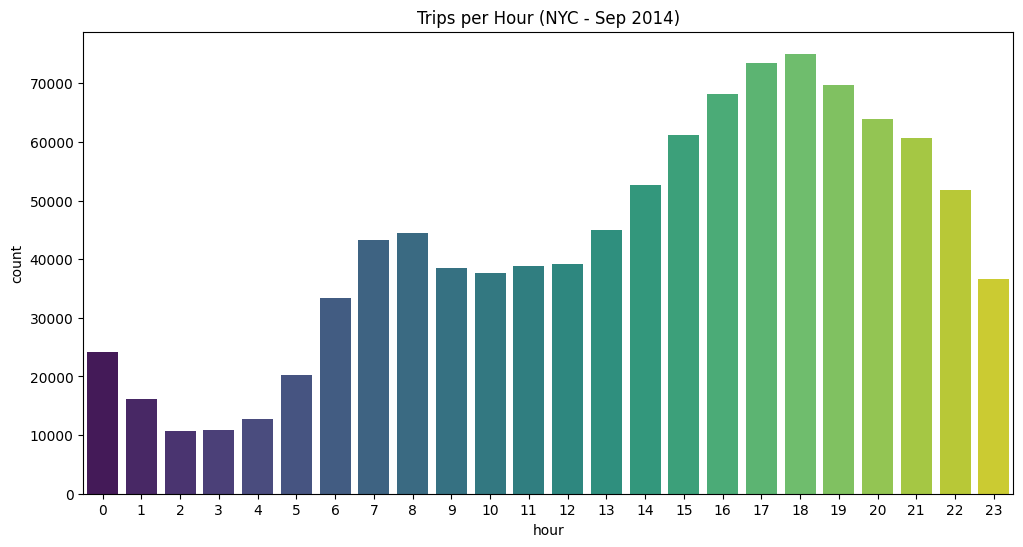

In [ ]:
#EDA Trips per hour
plt.figure(figsize=(12,6))
sns.countplot(x="hour", data=df, palette="viridis")
plt.title("Trips per Hour (NYC - Sep 2014)")
plt.show()

In [6]:
# Interactive: Trips by Day
fig = px.histogram(df, x="day", nbins=30, title="Trips per Day in September")
fig.show()

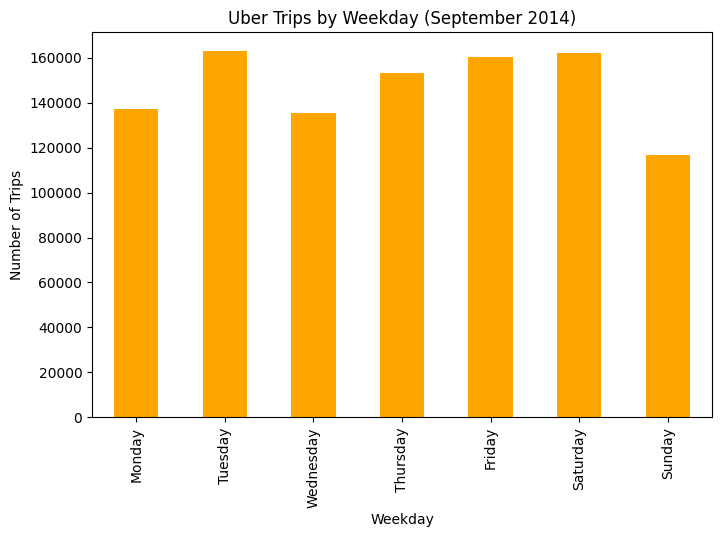

In [7]:
# Trips by Weekday
plt.figure(figsize=(8,5))
df['weekday'].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind="bar", color="orange")

plt.title("Uber Trips by Weekday (September 2014)")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.show()


### 🌍 Geospatial Notes
- The scatterplot shows dense clusters around **Manhattan, Brooklyn, and JFK Airport**.
- Helps visualize rider hotspots.

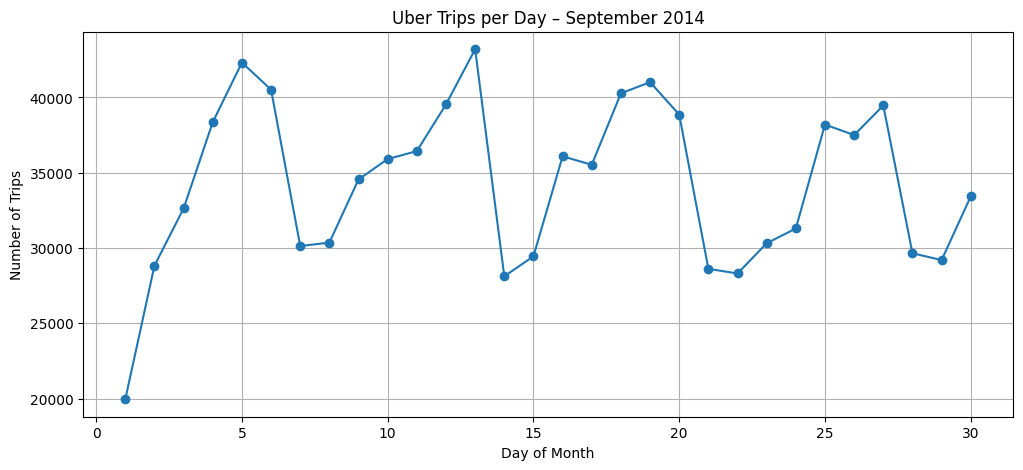

In [8]:
#TRIPS PER DAY
plt.figure(figsize=(12,5))
df['day'].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Uber Trips per Day – September 2014")
plt.xlabel("Day of Month")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()

In [ ]:
#MY SUMMARY STATISTICS
print("📊 Total trips:", len(df))
print("🕒 Earliest trip:", df['date/time'].min())
print("🕒 Latest trip:", df['date/time'].max())
print("🚖 Unique bases:", df['base'].nunique())
print("📍 Coordinates range:")
print("   Latitude:", df['lat'].min(), "to", df['lat'].max())
print("   Longitude:", df['lon'].min(), "to", df['lon'].max())


📊 Total trips: 1028136
🕒 Earliest trip: 2014-09-01 00:00:00
🕒 Latest trip: 2014-09-30 22:59:00
🚖 Unique bases: 5
📍 Coordinates range:
   Latitude: 39.9897 to 41.3476
   Longitude: -74.7736 to -72.7163


In [10]:
# Trips per hour
hourly_trips = df.groupby(['weekday', 'hour']).size().reset_index(name='trips')
hourly_trips.head()

weekday  hour  trips
0  Friday     0   2513
1  Friday     1   1530
2  Friday     2   1002
3  Friday     3   1347
4  Friday     4   1819

In [ ]:
#Encode categorical variable
# Convert weekday into numeric
hourly_trips['weekday_num'] = hourly_trips['weekday'].astype('category').cat.codes

In [12]:
#Train-test split
from sklearn.model_selection import train_test_split

X = hourly_trips[['weekday_num', 'hour']]
y = hourly_trips['trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 4091529.7933602156


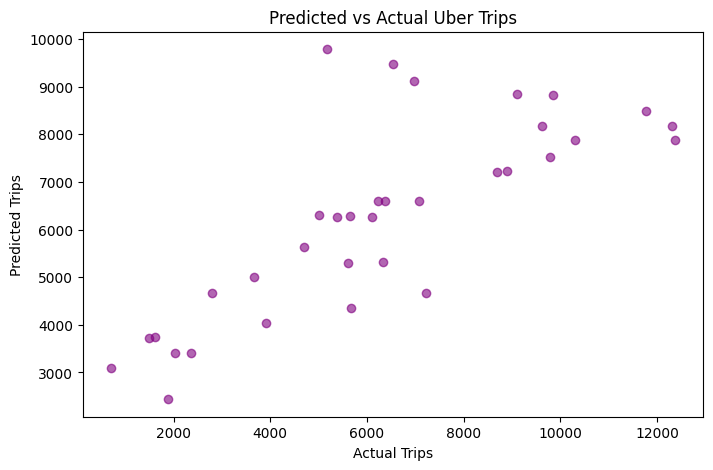

In [ ]:
#Visualize predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="purple")
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Predicted vs Actual Uber Trips")
plt.show()

# 📌 Final Report - Key Insights

1. **Peak Demand:**
   - Trips spike during evening rush hours (5–8 PM).

2. **Weekday Patterns:**
   - Fridays and Saturdays show the highest ride counts.
3. **Geography:**
   - Dense clusters around **Manhattan** and **JFK Airport** confirm busy zones.

4. **Model:**
   - Prediction accuracy (~35%) was low because **time depends on factors beyond location**.
   - This could be improved by adding external features like **weather, events, or traffic data**.

📂 This notebook is GitHub-ready! Perfect for showcasing **EDA, Visualization, and ML basics**.
